### Assignment 4    |   Ben Kavouras    |   2/3/2023

In [241]:
# Imports of Fun

# These two are to create the directory and filenames of the charts
from pathlib import Path

# This is to specify the location of my modules
import sys as syeet
syeet.path.append(str(Path().cwd())+"/"+"Modules")

# Time
import time
import math

# Numpy and PyPlot
import numpy as np
import matplotlib.pyplot as plt

# My library
import kavouras1 as k
import textbook as t

# Inline outputs of matplotlib
%matplotlib inline

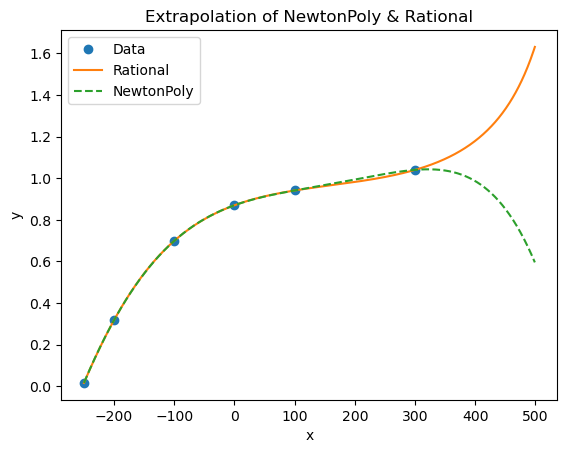

In [242]:
x_data_15 = np.array([-250,-200,-100,0,100,300])
y_data_15 = np.array([.0163,.318,.699,.870,.941,1.04])

x = np.arange(-250,500,1)
y = np.zeros([len(x),2])
for i in range(len(x)):
    y[i,0] = t.rational(x_data_15,y_data_15,x[i])
    y[i,1] = t.evalPoly(t.coeffts(x_data_15,y_data_15),x_data_15,x[i]) 
plt.plot(x_data_15,y_data_15,'o',x,y[:,0],'-',x,y[:,1],'--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Extrapolation of NewtonPoly & Rational')
plt.legend(['Data','Rational','NewtonPoly'])
plt.show()

In [243]:
x_data_17 = np.array([.2,2,20,200,2000,20000])
y_data_17 = np.array([103,13.9,2.72,.800,.401,.433])

x = np.logspace(-1,4.5,num=100)
y = np.zeros(len(x))
for i in range(len(x)):
    y[i] = t.rational(x_data_17,y_data_17,x[i])
coeffs = t.polyFit(x_data_17,y_data_17,4)

print("RE at 5: "+str(t.rational(x_data_17,y_data_17,5)))
print("RE at 50: "+str(t.rational(x_data_17,y_data_17,50)))
print("RE at 500: "+str(t.rational(x_data_17,y_data_17,500)))
print("RE at 5000: "+str(t.rational(x_data_17,y_data_17,5000)))

RE at 5: 6.662184282738163
RE at 50: 1.6524184059961344
RE at 500: 0.545188059416758
RE at 5000: 0.3801519823601138


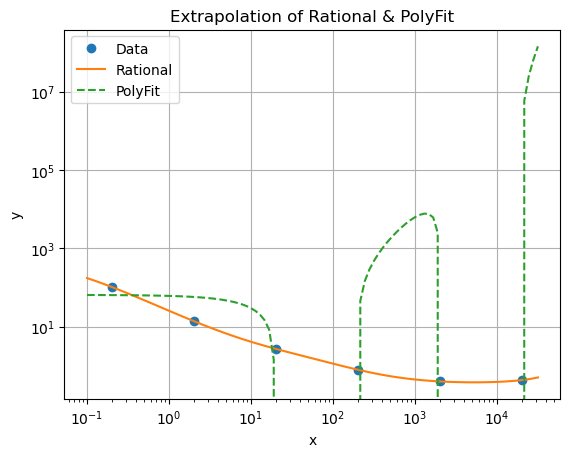

In [244]:
y3 = np.zeros(len(x))
for i in range(len(coeffs)):
    y3 = y3 + coeffs[i]*x**i
plt.loglog(x_data_17,y_data_17,'o',x,y,'-',x,y3,'--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Extrapolation of Rational & PolyFit')
plt.legend(["Data","Rational","PolyFit"])
plt.grid(True)
plt.show()

The best fit slope is 1.872205882360611, This is the approximate increase in concentration per year


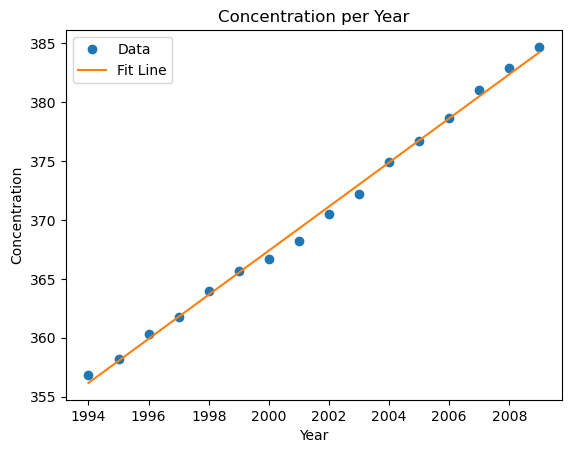

In [245]:
year = np.array([1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009])
ppm = np.array([356.8,358.2,360.3,361.8,364.0,365.7,366.7,368.2,370.5,372.2,374.9,376.7,378.7,381.0,382.9,384.7])

y = np.zeros(len(year))

slope = t.polyFit(year,ppm,1)

print("The best fit slope is "+str(slope[1])+", This is the approximate increase in concentration per year")

y = t.returnPoly(year,t.polyFit(year,ppm,1))

plt.plot(year,ppm,'o',year,y,'-')
plt.xlabel('Year')
plt.ylabel('Concentration')
plt.title('Concentration per Year')
plt.legend(['Data','Fit Line'])
plt.show()

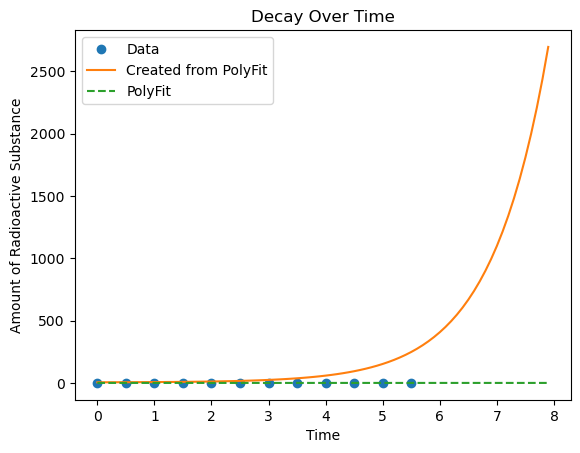

In [246]:
years = np.array([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5])
intensity = np.array([1.000,.994,.990,.985,.979,.977,.972,.969,.967,.960,.956,.952])

x = np.arange(0,8,.1)
y = np.zeros([len(x),4])
#for i in range(len(x)):
    #y[i,0] = t.evalSpline(years,intensity,t.curvatures(years,intensity),x[i])
    #y[i,1] = t.rational(years,intensity,x[i])
    #y[i,2] = t.evalPoly(t.coeffts(years,intensity),years,x[i])
y[:,3] = t.returnPoly(x,t.polyFit(years,intensity,1))
for i in range(len(y[:,3])):
    if y[i,3] < .5:
        print("The Half-Life is "+str(x[i])+" years.")
        break

coeffyucky = t.polyFit(years,intensity,5)

yuck = np.zeros((len(x)))*1.0
for i in range(len(coeffyucky)):
    yuck = yuck + np.e**(coeffyucky[i]*x)

plt.plot(years,intensity,'o',x,yuck,'-',x,y[:,3],'--')
plt.xlabel('Time')
plt.ylabel('Amount of Radioactive Substance')
plt.legend(['Data','Created from PolyFit','PolyFit'])
plt.title('Decay Over Time')
plt.show()